In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Data input and cleaning

In [2]:
sns.set()
data = pd.read_csv("data.csv", dtype={'time':np.float64})

data['error'] = [float(x[1:-1]) for x in data['fbest']]
data['finished'] = data['error'] <= 1
data['time_minutes'] = data['time'] / 60

data = data.join(data['freq'].str.split(', ', expand=True).apply(pd.to_numeric))

data.drop(["fbest", "freq", "sol", "time", "Unnamed: 0", "first"], axis=1, inplace=True)
    
data.rename(columns=lambda x: x+1 if type(x)==int else x, inplace=True)
data.head()

,error,finished,time_minutes,1,2,3,4,5,6
0,151.489646,False,18.476134,47.466112,319.547932,441.664889,462.457984,928.301000,1498.429547
1,151.489646,False,18.672214,47.466112,319.547932,441.664889,462.457984,928.301000,1498.429547
2,154.288300,False,19.941055,46.715313,323.448504,435.818314,470.401652,1006.671434,1453.150348
3,151.489646,False,18.844634,47.466112,319.547932,441.664889,462.457984,928.301000,1498.429547
4,151.489646,False,22.386694,47.466112,319.547932,441.664889,462.457984,928.301000,1498.429547


In [3]:
data.describe()

,error,time_minutes,1,2,3,4,5,6
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,152.698003,20.168525,46.956790,322.025218,436.633930,462.255469,948.741328,1501.482737
std,1.313677,1.599307,1.814566,3.721273,16.252599,17.625514,23.314455,47.502774
min,151.489646,16.788097,43.386577,317.477332,404.115963,434.224418,928.301000,1397.477920
25%,151.489646,18.887891,46.348302,319.547932,431.297944,449.884576,928.301000,1491.288331
50%,152.415508,20.134483,47.466112,320.822614,441.664889,462.457984,939.979119,1498.429547
75%,153.472265,21.298440,47.466112,322.456556,441.664889,469.044424,965.949754,1533.724337
max,157.034509,23.850700,50.331401,333.366318,466.013473,505.213796,1006.671434,1581.343924


### Natural frequencies

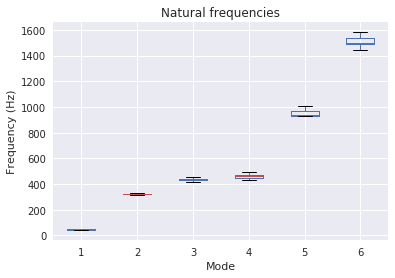

In [4]:
freq = data.drop(['error', 'finished', 'time_minutes'], axis=1)
freq.boxplot()
plt.title("Natural frequencies")
plt.xlabel("Mode")
plt.ylabel("Frequency (Hz)")
plt.show()

### Solution times and final errors

/home/byi649/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


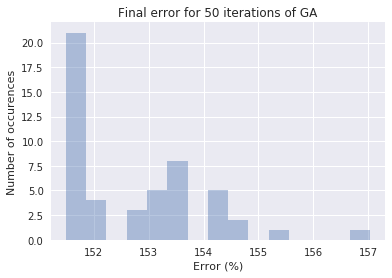

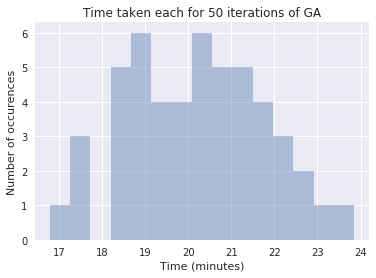

In [5]:
ax = sns.distplot(data['error'], bins=15, kde=False, norm_hist=False)
ax.set(xlabel="Error (%)", ylabel="Number of occurences", title="Final error for 50 iterations of GA")
plt.show()

ax = sns.distplot(data['time_minutes'], bins=15, kde=False, norm_hist=False)
ax.set(xlabel="Time (minutes)", ylabel="Number of occurences", title="Time taken each for 50 iterations of GA")
plt.show()

### Grouping by finish time

In [6]:
print(data['finished'].value_counts().to_string())

False    50


/home/byi649/.local/lib/python3.5/site-packages/seaborn/distributions.py:195: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/byi649/.local/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/byi649/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


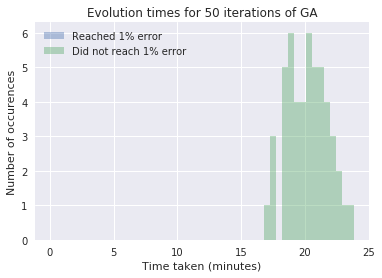

In [7]:
ax = sns.distplot(data['time_minutes'].loc[data['finished']], bins=15, kde=False, norm_hist=False, label="Reached 1% error")
sns.distplot(data['time_minutes'].loc[-data['finished']], bins=15, kde=False, norm_hist=False, label="Did not reach 1% error")
ax.set(xlabel="Time taken (minutes)", ylabel="Number of occurences", title="Evolution times for 50 iterations of GA")
plt.legend()
plt.show()